<a href="https://colab.research.google.com/github/hosseinrezaie0/30-AI-Projects-in-30-Days/blob/main/Day%201/Image%20Classificaiton%20-%20Hand%20Written%20Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

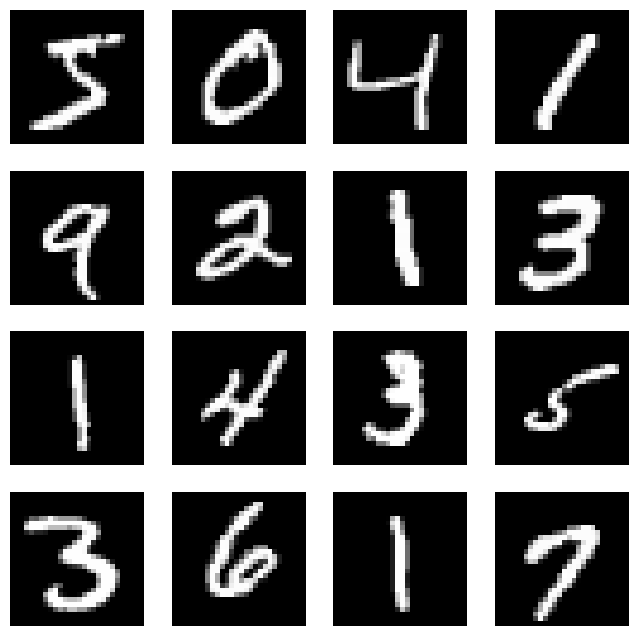

In [ ]:
# Plot 16 ranom samples of the mnist dataset
fig,axes = plt.subplots(4,4,figsize=(8,8))
for i in range(4):
  for j in range(4):
    axes[i][j].imshow(x_train[i*4+j],cmap='gray')
    axes[i][j].axis('off')
plt.show()

In [ ]:
# Nomalize the data's values to [0,1]
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Reshape the data to be 3 dimensional
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train[0]

5

In [ ]:
# Convet the labels to one hot vectors so we can use categorical_crossentropy
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])